<a href="https://colab.research.google.com/github/kpatel3j/homework-0/blob/master/Intro_to_Pandas_%5Bshareable%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Google Colab

Colab is essentially Google's way of hosting a [jupyter notebook](https://jupyter.org/). A very popular tool to use as a data scientist!

It allows us to write code, documentation, and output visuals all in one place.

To be able to and edit the code in this workshop. Please make a copy for yourself

`file > save a copy in drive`

This should open a new tab with your own copy of this notebook. It can take a minute to load.

Colab also gives you some options for running complicated computations such as training deep learning model. To see access those options:

`Runtime > change runtime type` Select `GPU`, `TPU`, or `None`

We don't need to change anything for this workshop, but its a great resource if you start learning deep learning and don't have a powerful GPU at home. 

This is a text cell. 

You can add a new text cell by clicking `+ Text` above. 

It does not highlight wrong spelling. I apologize for any typos!

# Intro to Pandas


## What is it anyways?

Pandas is a powerful and easy to use open source data analysis library built on top of the Python programming language.


Much like regular expressions, it can be helpful to have a cheat sheet around to assist in learning the different methods available to you: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

## A quick example

We can begin to use pandas by importing it

`import pandas as pd`

note: By popular convention, we import pandas and alias it as "pd"


In [ ]:
import pandas as pd

We can leverage a weather API to retrieve data for the city of Seattle on a specific date

https://www.metaweather.com/api/

We'll use the requests library to make an API call to metaweather for the Seattle location: 2490383 for the first day in 2021.




In [ ]:
import requests

base_url='https://www.metaweather.com/api/location/2490383/2021/1/'

response=requests.get(base_url+'1')

In [ ]:
df=pd.DataFrame(response.json())

#### We can use the `.head()` method to view the first n=5 rows

In [ ]:
df.head()

,id,weather_state_name,weather_state_abbr,wind_direction_compass,created,applicable_date,min_temp,max_temp,the_temp,wind_speed,wind_direction,air_pressure,humidity,visibility,predictability
0,5707933120724992,Heavy Rain,hr,S,2021-01-02T06:44:36.737810Z,2021-01-01,7.050,10.580,9.035,9.304678,182.993885,1008.0,90,5.086545,77
1,4903038666932224,Heavy Rain,hr,S,2021-01-02T03:44:36.360633Z,2021-01-01,7.040,10.650,8.965,9.549684,182.326801,1007.5,90,4.620827,77
2,4847625401532416,Heavy Rain,hr,S,2021-01-02T00:44:34.173472Z,2021-01-01,7.040,10.650,9.575,6.432895,174.850294,1008.0,87,11.393462,77
3,5792402175426560,Heavy Rain,hr,S,2021-01-01T21:44:35.745670Z,2021-01-01,7.040,10.650,9.645,6.358330,174.850294,1008.0,87,10.276237,77
4,5598190330970112,Heavy Rain,hr,SSE,2021-01-01T18:44:35.455497Z,2021-01-01,6.925,10.145,9.770,6.674234,153.606175,1008.0,89,8.379812,77


#### Try calling head again and providing a single int argument with the number of rows that you'd like to view

In [ ]:
# your code here



#### Okay, but how do we know how many rows we have total?

In [ ]:
# Call the .count() method on the DataFrame
df.count()

#### And what about columns?

In [ ]:
df.columns

Index(['id', 'weather_state_name', 'weather_state_abbr',
       'wind_direction_compass', 'created', 'applicable_date', 'min_temp',
       'max_temp', 'the_temp', 'wind_speed', 'wind_direction', 'air_pressure',
       'humidity', 'visibility', 'predictability'],
      dtype='object')

In [ ]:
# use .info() to learn all details at once
df.info()

## How and when to use it

We use Pandas when we have data that could easily have been found in an Excel document, or even a SQL table

In essence, if our data contains a relationship between the rows and columns we can use Pandas

## DataFrame vs Database?

A DataFrame is a two-dimensional tabular data structure.

A traditional database contains tables. Tables are two-dimensional tabular data structures.

In essence, a database can be thought of very similarly to a collection of Pandas DataFrames that may or may not have rules regarding how they relate. 

## DataFrame vs a Series

A Pandas Series is a one-dimensional array that can hold any data type and has axis labels.

The primary data structure in Pandas is a Series and a single column in a DataFrame is actually a Series. So a DataFrame as a whole, is a collection of Series.

You will find that there are many methods shared between the two data structures (such as .sum(), max() etc.)

The methods on a DataFrame typically target one or more columns (Series) whereas the same method on the Series will only apply to itself.


In [ ]:
# Here is what a series looks like printed. 

id                5.633594e+15
min_temp          5.671111e+00
max_temp          8.732569e+00
the_temp          7.682014e+00
wind_speed        5.439662e+00
wind_direction    1.568122e+02
air_pressure      1.010757e+03
humidity          8.579167e+01
visibility        8.186817e+00
predictability    7.694444e+01
dtype: float64

In [ ]:
# lets make a simple, example dataframe to work with
ex_df=pd.DataFrame([[1,100],[2,200],[3,300],[4,400],[5,500]],columns=['col1','col2'])
ex_df

,col1,col2
0,1,100
1,2,200
2,3,300
3,4,400
4,5,500


In [ ]:
# lets compare that with a simple series. 
# see how a dataframe is like multiple series grouped together in a table?
ex_series=pd.Series([1,2,3,4,5])
ex_series

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [ ]:
# We have direct access to aggregate methods on both DataFrames and Series
print(f'DF Sum:\n{ex_df.sum()}\n')
print(f'Series Sum: {ex_series.sum()}')


DF Sum:
col1      15
col2    1500
dtype: int64

Series Sum: 15


In [ ]:
# try at least two other functions on both (mean, min, max, std, etc.)
# example: 
ex_df.max()
# your code here:


col1      5
col2    500
dtype: int64

In [ ]:
# What do they have in common?

# We'll first store the __dict__ for each Object
series_dict = pd.Series.__dict__
df_dict = pd.DataFrame.__dict__

# Then use set theory to find their intersection
common_dict = pd.Series(list(set(series_dict).intersection(set(df_dict))))

# We filter out anything that starts with an underscore, 
# indicating hidden/private
private_mask=common_dict.apply(lambda x: x.startswith('_') == False)

# Then use that mask to select everything else
print(f"The DataFrame and Series share: {len(common_dict[private_mask])} attributes\n")

print("The first 20:\n")
print(common_dict[private_mask][0:20])

The DataFrame and Series share: 107 attributes

The first 20:

0           std
1        divide
3     to_period
4          diff
5        idxmax
9           mod
11         radd
12         mean
13       sparse
14        shift
17      unstack
18         rdiv
19          sem
20          max
24     set_axis
27         kurt
29          dot
30      rolling
32       append
33        notna
dtype: object


a full list of series attributes may be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

a full list of dataframe attributes may be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

### Slicing

What is a slice?

Just like a slice of pie, we take a portion of the whole

In [ ]:
# Let's first slice in the traditional Python list

small_list = [1,2,3,4,5,6,7,8,9,10]

# If we want to retrieve the first element
small_list[0]

1

In [ ]:
# What about the last element?
small_list[-1]

10

In [ ]:
# We can also retrieve a range of values, in this case
# the first five elements
small_list[0:5]

[1, 2, 3, 4, 5]

In [ ]:
# Using this knowledge of the start index and ending index
# Retrieve numbers 3 through 8

# Your code here


In [ ]:
# Can we filter (using a mask) the list using
# comparison operators? (>,<, ==, etc)

small_list[small_list > 5]

In [ ]:
# No! Unfortunately, the standard implementation of a Python List doesn't
# support masking operations

# Series to the rescue!
small_series = pd.Series(small_list)

In [ ]:
small_series[small_series > 5]

5     6
6     7
7     8
8     9
9    10
dtype: int64

In [ ]:
# Try some slices of your own!

small_series[:5]

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [ ]:
# Use a mask to keep all even values (hint %)


# The Data in DataFrame

## Loading data

In [ ]:
# pd.read_csv() is able to create a dataframe from a link or csv file on your local machine
abnb_df=pd.read_csv('https://raw.githubusercontent.com/curran/data/gh-pages/airbnb/airbnb_session_data.txt', sep='|')

In [ ]:
# use dataframe.head() to get the first five rows
abnb_df.head()

,id_visitor,id_session,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,sent_booking_request,next_id_session,next_dim_session_number,next_dim_user_agent,next_dim_device_app_combo,next_ds,next_ts_min,next_ts_max,next_did_search,next_sent_message,next_sent_booking_request
0,ed1329a6-064d-47e9-93bc-93f5a50822df,a8dfb8ed5aa79e00ff14b2da297c9778,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2015-02-16,2015-02-16 21:50:41,2015-02-16 22:13:42,0,0,0,b812bf56bf89b0b31f4e5b50d0c15ff8,84.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0.0,0.0,0.0
1,ed1329a6-064d-47e9-93bc-93f5a50822df,950277daef16f86dc2c05d2b212eea81,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,0,456083b5f5506ad125d595006819de1d,85.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0.0,0.0,0.0
2,ed1329a6-064d-47e9-93bc-93f5a50822df,ee4e2f99dd0c0bef2d40e4bdf880c862,85,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0,0,0,94d30e9f3c8f92ae691e49d77a884777,86.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0.0,0.0,0.0
3,ed1329a6-064d-47e9-93bc-93f5a50822df,59fbde7b5d35403116c461fa7fc1ab6e,86,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0,0,0,ab02139dc81bea4b126cf5043faf53d9,87.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0.0,0.0,0.0
4,ed1329a6-064d-47e9-93bc-93f5a50822df,ec8972a3c7256ea4dcba61ee2bd9e3a8,87,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0,0,0,6a69db1a5876e9798947f20e2c52bcc8,88.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 22:21:58,2015-02-19 22:22:02,0.0,0.0,0.0


In [ ]:
# use dataframe.tail() to get the final five rows
abnb_df.tail()

,id_visitor,id_session,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,sent_booking_request,next_id_session,next_dim_session_number,next_dim_user_agent,next_dim_device_app_combo,next_ds,next_ts_min,next_ts_max,next_did_search,next_sent_message,next_sent_booking_request
7751,1414271365_EuFmeZ+vsDuryP8F,2ae345e9ad2aff5195dab5528b63f7ef,3,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,iPad - Web,2014-12-30,2014-12-30 06:17:11,2014-12-30 06:53:15,1,0,0,8d59f1935a7f636eb6bcba0f27e36dcb,4.0,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,iPad - Web,2015-01-11,2015-01-11 03:09:42,2015-01-11 03:23:26,1.0,0.0,0.0
7752,1414271365_EuFmeZ+vsDuryP8F,3abcb63cbef3c7a5d77e7b7b5da0dacf,4,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,iPad - Web,2015-01-11,2015-01-11 03:09:42,2015-01-11 03:23:26,1,0,0,bba9bb8e12360e95a664e2f7c46124bc,5.0,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,iPad - Web,2015-02-16,2015-02-16 02:48:38,2015-02-16 02:59:20,1.0,0.0,0.0
7753,1414271365_EuFmeZ+vsDuryP8F,e7ce67245dc553d51673d33e7b1a53a7,5,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,iPad - Web,2015-02-16,2015-02-16 02:48:38,2015-02-16 02:59:20,1,0,0,7ad89a28468df5bab4c4244588806960,6.0,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,iPad - Web,2015-03-11,2015-03-11 10:33:52,2015-03-11 10:34:21,0.0,0.0,0.0
7754,1414271365_EuFmeZ+vsDuryP8F,472d2822a2707b384d27ec510594dcee,6,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,iPad - Web,2015-03-11,2015-03-11 10:33:52,2015-03-11 10:34:21,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7755,1416012256_dB6ft6mhjVRXX48c,38f19c985529fc64f8759f614632731d,1,Mozilla/5.0 (Windows NT 6.2; Win64; x64) Apple...,Desktop - Chrome,2014-10-25,2014-10-25 00:44:17,2014-10-25 00:44:17,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## loc & iloc

`df.loc` allows you to access a group of rows and columns by **label(s) or boolean array**

### For example:

Select all values in column Age: `df.loc[:,'max_temp']`

Select the first row in column Age: `df.loc[0, 'max_temp']`

`df.iloc` allows **integer-location** based indexing for selections

### For example:

Select the first row: `df.iloc[0]` 

Select the a slice of rows: `df.iloc[0:10]`



In [ ]:
# using loc
df.loc[:,'max_temp']

0     10.580
1     10.650
2     10.650
3     10.650
4     10.145
       ...  
67     6.380
68     5.490
69     5.490
70     5.640
71     5.640
Name: max_temp, Length: 72, dtype: float64

In [ ]:
# using iloc
df.iloc[0:20]

In [ ]:
# experiment with loc and iloc



## Filtering



In [ ]:
abnb_df.head()

,id_visitor,id_session,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,sent_booking_request,next_id_session,next_dim_session_number,next_dim_user_agent,next_dim_device_app_combo,next_ds,next_ts_min,next_ts_max,next_did_search,next_sent_message,next_sent_booking_request
0,ed1329a6-064d-47e9-93bc-93f5a50822df,a8dfb8ed5aa79e00ff14b2da297c9778,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2015-02-16,2015-02-16 21:50:41,2015-02-16 22:13:42,0,0,0,b812bf56bf89b0b31f4e5b50d0c15ff8,84.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0.0,0.0,0.0
1,ed1329a6-064d-47e9-93bc-93f5a50822df,950277daef16f86dc2c05d2b212eea81,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,0,456083b5f5506ad125d595006819de1d,85.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0.0,0.0,0.0
2,ed1329a6-064d-47e9-93bc-93f5a50822df,ee4e2f99dd0c0bef2d40e4bdf880c862,85,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0,0,0,94d30e9f3c8f92ae691e49d77a884777,86.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0.0,0.0,0.0
3,ed1329a6-064d-47e9-93bc-93f5a50822df,59fbde7b5d35403116c461fa7fc1ab6e,86,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0,0,0,ab02139dc81bea4b126cf5043faf53d9,87.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0.0,0.0,0.0
4,ed1329a6-064d-47e9-93bc-93f5a50822df,ec8972a3c7256ea4dcba61ee2bd9e3a8,87,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0,0,0,6a69db1a5876e9798947f20e2c52bcc8,88.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 22:21:58,2015-02-19 22:22:02,0.0,0.0,0.0


In [ ]:
# Here we explicitly name columns
abnb_df.filter(items=['sent_message','did_search','dim_device_app_combo'])

,sent_message,did_search,dim_device_app_combo
0,0,0,iPhone - iOS
1,0,0,Desktop - Chrome
2,0,0,Desktop - Chrome
3,0,0,Desktop - Chrome
4,0,0,Desktop - Chrome
...,...,...,...
7751,0,1,iPad - Web
7752,0,1,iPad - Web
7753,0,1,iPad - Web
7754,0,0,iPad - Web


In [ ]:
# Here is an alternative way to get the same result
abnb_df[['sent_message','did_search','dim_device_app_combo']]

,sent_message,did_search,dim_device_app_combo
0,0,0,iPhone - iOS
1,0,0,Desktop - Chrome
2,0,0,Desktop - Chrome
3,0,0,Desktop - Chrome
4,0,0,Desktop - Chrome
...,...,...,...
7751,0,1,iPad - Web
7752,0,1,iPad - Web
7753,0,1,iPad - Web
7754,0,0,iPad - Web


In [ ]:
# We can use regex to match axis labels as well
# this will grab any column with 'dim' in the title string
abnb_df.filter(regex='dim', axis=1)

,id_session,dim_session_number,next_id_session,next_dim_session_number
0,a8dfb8ed5aa79e00ff14b2da297c9778,83,b812bf56bf89b0b31f4e5b50d0c15ff8,84.0
1,950277daef16f86dc2c05d2b212eea81,84,456083b5f5506ad125d595006819de1d,85.0
2,ee4e2f99dd0c0bef2d40e4bdf880c862,85,94d30e9f3c8f92ae691e49d77a884777,86.0
3,59fbde7b5d35403116c461fa7fc1ab6e,86,ab02139dc81bea4b126cf5043faf53d9,87.0
4,ec8972a3c7256ea4dcba61ee2bd9e3a8,87,6a69db1a5876e9798947f20e2c52bcc8,88.0
...,...,...,...,...
7751,2ae345e9ad2aff5195dab5528b63f7ef,3,8d59f1935a7f636eb6bcba0f27e36dcb,4.0
7752,3abcb63cbef3c7a5d77e7b7b5da0dacf,4,bba9bb8e12360e95a664e2f7c46124bc,5.0
7753,e7ce67245dc553d51673d33e7b1a53a7,5,7ad89a28468df5bab4c4244588806960,6.0
7754,472d2822a2707b384d27ec510594dcee,6,NaN,NaN


In [ ]:
# Like is another alternative
# use like to find any column with the word in it
abnb_df.filter(like='session')

,id_session,dim_session_number,next_id_session,next_dim_session_number
0,a8dfb8ed5aa79e00ff14b2da297c9778,83,b812bf56bf89b0b31f4e5b50d0c15ff8,84.0
1,950277daef16f86dc2c05d2b212eea81,84,456083b5f5506ad125d595006819de1d,85.0
2,ee4e2f99dd0c0bef2d40e4bdf880c862,85,94d30e9f3c8f92ae691e49d77a884777,86.0
3,59fbde7b5d35403116c461fa7fc1ab6e,86,ab02139dc81bea4b126cf5043faf53d9,87.0
4,ec8972a3c7256ea4dcba61ee2bd9e3a8,87,6a69db1a5876e9798947f20e2c52bcc8,88.0
...,...,...,...,...
7751,2ae345e9ad2aff5195dab5528b63f7ef,3,8d59f1935a7f636eb6bcba0f27e36dcb,4.0
7752,3abcb63cbef3c7a5d77e7b7b5da0dacf,4,bba9bb8e12360e95a664e2f7c46124bc,5.0
7753,e7ce67245dc553d51673d33e7b1a53a7,5,7ad89a28468df5bab4c4244588806960,6.0
7754,472d2822a2707b384d27ec510594dcee,6,NaN,NaN


# Manipulating DataFrames


In [ ]:
# sklearn has some great free datasets
from sklearn import datasets
help(datasets)


In [ ]:
ca_housing=datasets.fetch_california_housing()

In [ ]:
# Perhaps we can bin values into ranges that make grouping easier
df=pd.DataFrame(ca_housing.data, columns=ca_housing.feature_names)

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
# Add a column to df like so
df['new'] = list(range(0,20640))

# we can make new columns based on values for other columns
# this is the basis of feature engineering
df['rooms + bedrooms'] = df['AveRooms'] + df['AveBedrms']

In [ ]:
# add a row to df with df.append()

dic = {'MedInc':'look', 'HouseAge':'how', 'AveRooms':'neat', 'AveBedrms':'this', 'Population':'is', 'AveOccup':'everybody',
       'Latitude':'!', 'Longitude':'!', 'new':'!'}

df = df.append(dic, ignore_index = True)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,new,rooms + bedrooms
0,8.3252,41,6.98413,1.02381,322,2.55556,37.88,-122.23,0,8.007937
1,8.3014,21,6.23814,0.97188,2401,2.10984,37.86,-122.22,1,7.210018
2,7.2574,52,8.28814,1.07345,496,2.80226,37.85,-122.24,2,9.361582
3,5.6431,52,5.81735,1.07306,558,2.54795,37.85,-122.25,3,6.890411
4,3.8462,52,6.28185,1.08108,565,2.18147,37.85,-122.25,4,7.362934
...,...,...,...,...,...,...,...,...,...,...
20636,2.5568,18,6.11404,1.31579,356,3.12281,39.49,-121.21,20636,7.429825
20637,1.7,17,5.20554,1.12009,1007,2.32564,39.43,-121.22,20637,6.325635
20638,1.8672,18,5.32951,1.17192,741,2.12321,39.43,-121.32,20638,6.501433
20639,2.3886,16,5.25472,1.16226,1387,2.61698,39.37,-121.24,20639,6.416981


In [ ]:
# remove a column from a df
# axis = 1 is for columns, axis = 0 for rows
df = df.drop(columns = ['new'], axis =1)

df = df.drop([20640], axis = 0)

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,rooms + bedrooms
0,8.3252,41,6.98413,1.02381,322,2.55556,37.88,-122.23,8.007937
1,8.3014,21,6.23814,0.97188,2401,2.10984,37.86,-122.22,7.210018
2,7.2574,52,8.28814,1.07345,496,2.80226,37.85,-122.24,9.361582
3,5.6431,52,5.81735,1.07306,558,2.54795,37.85,-122.25,6.890411
4,3.8462,52,6.28185,1.08108,565,2.18147,37.85,-122.25,7.362934
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.04545,1.13333,845,2.56061,39.48,-121.09,6.178788
20636,2.5568,18,6.11404,1.31579,356,3.12281,39.49,-121.21,7.429825
20637,1.7,17,5.20554,1.12009,1007,2.32564,39.43,-121.22,6.325635
20638,1.8672,18,5.32951,1.17192,741,2.12321,39.43,-121.32,6.501433


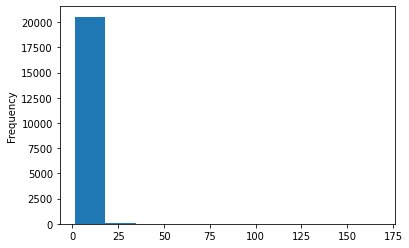

In [ ]:
# lets use our new feature 'rooms + bedrooms' to look at the data
# We can use a histogram to visualize how the total room count varies across the dataset
# but without any adjustment, our plot is hard to understand
df['rooms + bedrooms'].plot(kind='hist', bins=10)

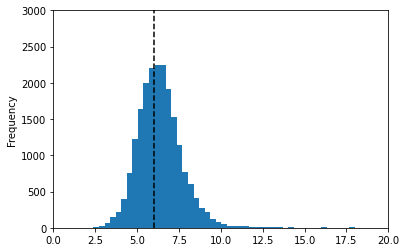

In [ ]:
# with some simple tuning, we can get a much more indepth look
# we can see a clear peak at about 6 total rooms in the houses.
# this is therefore the most common room count in this dataset
ax = df['rooms + bedrooms'].plot(kind='hist', bins=500, xlim = (0,20), ylim = (0,3000))
ax.axvline(6, color='k', linestyle='--')
ax

## Using the Cut Function

Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable. For example, `cut` could convert ages to groups of
age ranges. Supports binning into an equal number of bins, or a
pre-specified array of bins.

In [ ]:
df=pd.DataFrame(ca_housing.data, columns=ca_housing.feature_names)
pd.cut?

In [ ]:
# what this does here is it creates a series
# corresponding to the indexes of the original df.
# the values are the calculated categorization ranges
# determined by the cut function. 

# parameters for pd.cut(df.feature, int):
# df.feature : dataframe feature of interest
# int : how many categories to create using cut

# use value counts to see how many of each category
pd.cut(df.Population, 3).value_counts()

(-32.679, 11896.0]    20626
(11896.0, 23789.0]       12
(23789.0, 35682.0]        2
Name: Population, dtype: int64

In [ ]:
# make a column of these groupings and add it our original dataset
df['pop_bin']=pd.cut(df.Population, 5)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,pop_bin
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,"(-32.679, 7138.8]"
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,"(-32.679, 7138.8]"
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,"(-32.679, 7138.8]"
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,"(-32.679, 7138.8]"
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,"(-32.679, 7138.8]"
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,"(-32.679, 7138.8]"
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,"(-32.679, 7138.8]"
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,"(-32.679, 7138.8]"
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,"(-32.679, 7138.8]"


In [ ]:
# use groupby function to then actually bin the values.
df.groupby('pop_bin' ).mean()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
pop_bin,,,,,,,,
"(-32.679, 7138.8]",3.866423,28.736006,5.427062,1.096804,1382.208262,3.005628,35.634839,-119.572994
"(7138.8, 14274.6]",4.622491,11.289720,5.745971,1.074022,8617.121495,15.483207,35.092430,-118.970280
"(14274.6, 21410.4]",6.273550,5.500000,6.949871,1.071791,15742.750000,3.228386,35.097500,-118.707500
"(21410.4, 28546.2]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(28546.2, 35682.0]",2.440800,12.500000,5.317508,1.035084,32124.000000,6.089441,34.995000,-119.605000


Question time: 
In the last cell, category (21410.4, 28546.2] is all "NaN" values. This means "None" and it represents an absence or null value in that row/column. Why do we have null values in this situation above?
 

# Generating descriptic statistics


In [ ]:
df.describe?

In [ ]:
# Here we have our 5 number summary, as well as the count, mean, and standard deviation.
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
# use percentiles parameter to select new ranges to examine
df.describe(percentiles=[0.1, 0.5, 0.9])

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
10%,1.903800,13.000000,3.790884,0.966415,510.000000,2.075630,33.630000,-122.290000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
90%,6.159210,46.000000,6.961188,1.172727,2566.000000,3.885273,38.480000,-117.250000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


# Visualizing your DataFrame


In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'pop_bin'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
# use inline to ensure the plot shows
%matplotlib inline

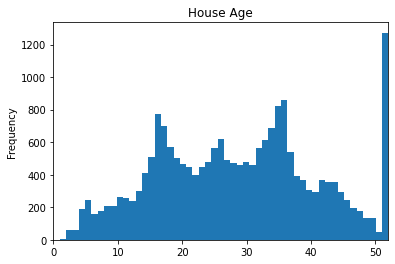

In [ ]:
fig, ax = plt.subplots()

ax.set_title('House Age')

df.HouseAge.plot(kind='hist', ax=ax, bins = 52, xlim = (0,52));

Text(0.5, 0, 'Average bedrooms')

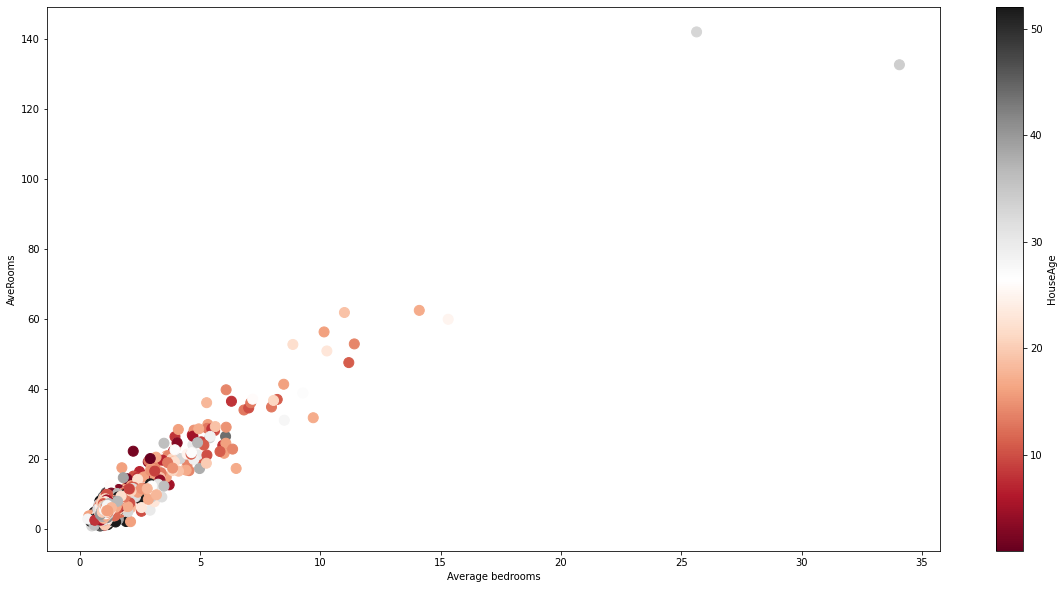

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))

df.plot(ax=ax, kind='scatter', x='AveBedrms', y='AveRooms', c='HouseAge', cmap = 'RdGy',s = 100, alpha =1)
ax.set_xlabel('Average bedrooms')


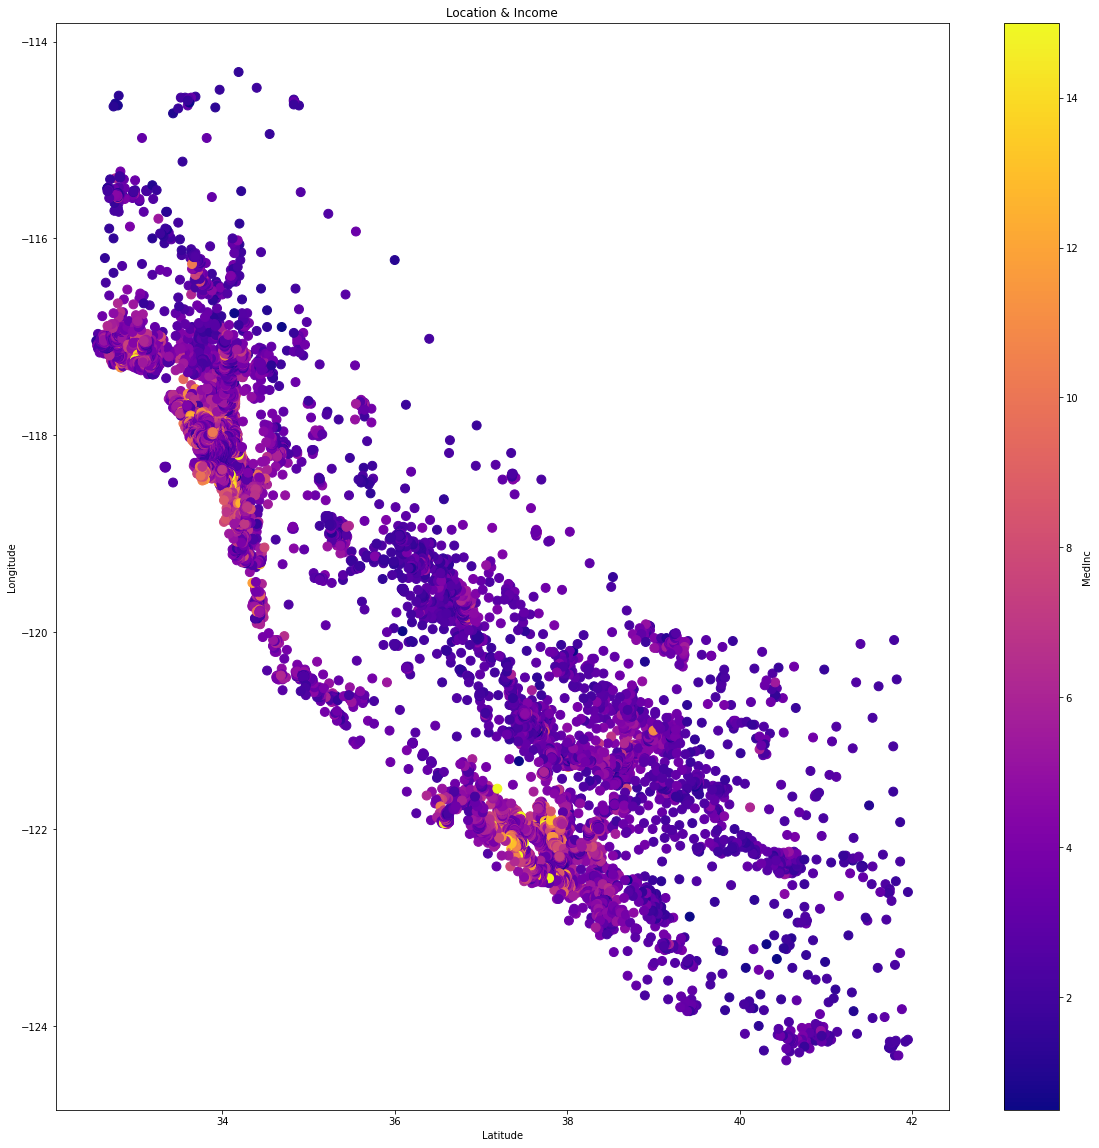

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))

ax.set_title('Location & Income')

from matplotlib import cm

df.plot(kind='scatter', x='Latitude', y='Longitude',c='MedInc', cmap='plasma', ax=ax, s = 80);

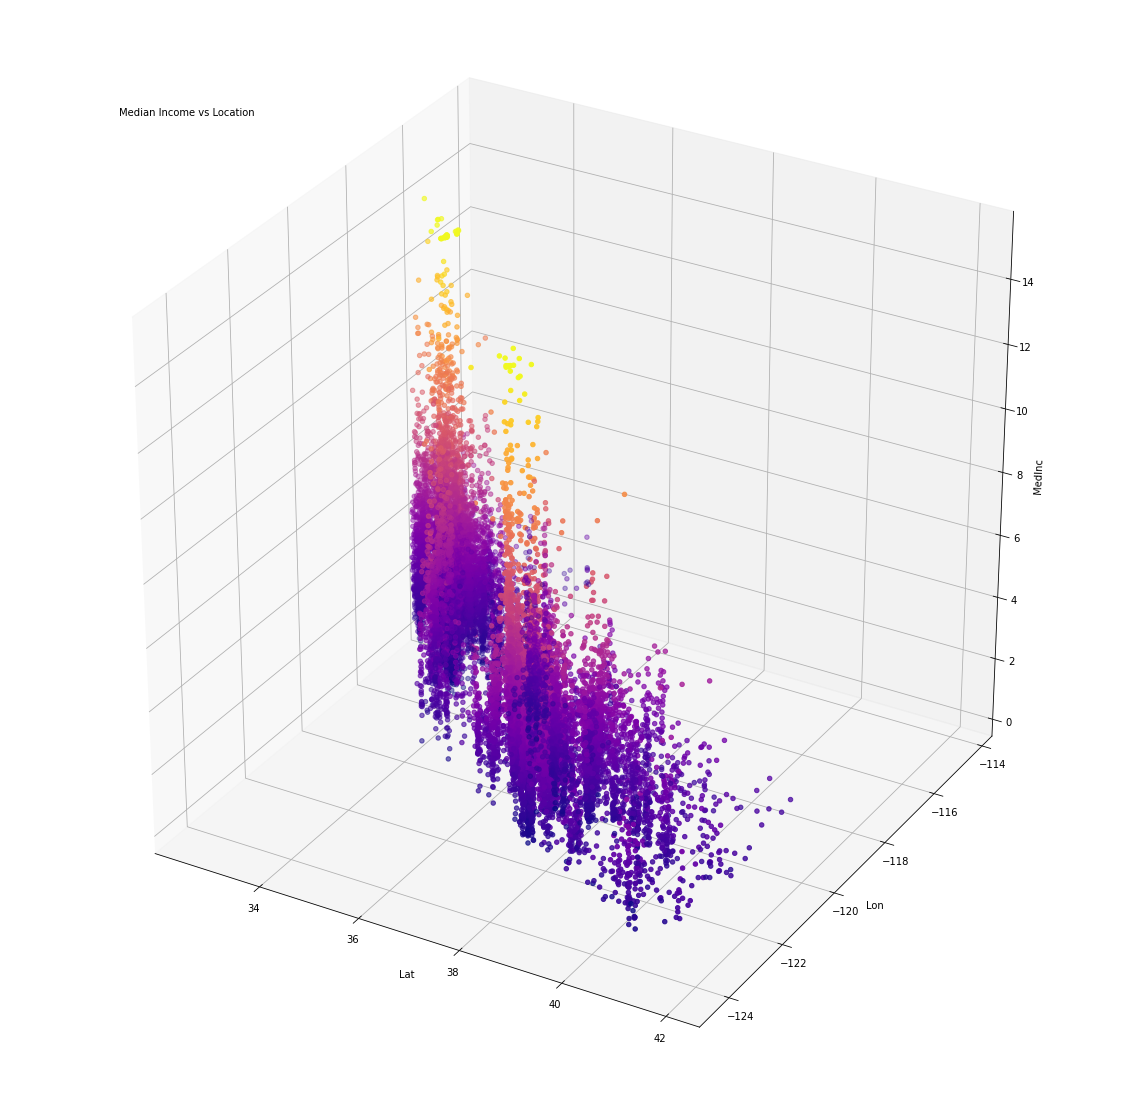

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(20,20))
ax=fig.gca(projection='3d')

ax.scatter(df['Latitude'], df['Longitude'], df['MedInc'], c=df['MedInc'], cmap='plasma')
ax.set_top_view()
ax.set_xlabel('Lat')
ax.set_ylabel('Lon')
ax.set_zlabel('MedInc')
ax.text2D(0.1, 0.9, 'Median Income vs Location', transform=ax.transAxes);

# Intro to optimizating performance


Numpy uses vectors which you can think of similarly to a list in Python, except that all of the data is co-located in memory.

This enables you to perform operations across the entire vector without looping. This is known as **broadcasting**.

I encourage you to read more here: https://numpy.org/doc/stable/user/whatisnumpy.html

In [ ]:
import numpy as np

large_matrix = np.random.normal(0, 1, size=(10**5, 3))

In [ ]:
df=pd.DataFrame(large_matrix)

In [ ]:
df

,0,1,2
0,1.323481,0.187418,-0.650698
1,-0.521690,0.063507,0.154324
2,-0.356309,-0.842360,-1.079780
3,2.424925,0.667416,-1.153588
4,-1.115925,-0.753581,-0.216289
...,...,...,...
99995,-1.816674,2.171539,1.056946
99996,1.089347,2.020277,-0.619154
99997,0.065623,-0.315115,-0.209324
99998,0.638307,1.063212,-1.689038


In [ ]:
def square(x):
  return x**2

Let's compare the run time for iteration across the rows, using the numba library, and using the classic numpy

In [ ]:
%timeit [square(x[0]) for x in df.iterrows()]

1 loop, best of 5: 4.49 s per loop


In [ ]:
from numpy import vectorize

In [ ]:
@vectorize
def square_numpy(x):
  return x**2

In [ ]:
%timeit square_numpy(df)

10 loops, best of 5: 64.9 ms per loop


In [ ]:
%timeit vectorize(square)(df[0])

10 loops, best of 5: 20.5 ms per loop


We were actually squaring every column in our matrix, so although it looked 

In [ ]:
import numba

# Numba is an open source JIT compiler that translates a subset 
# of Python and NumPy code into fast machine code.


@numba.vectorize()
def square_numba(x):
  return x**2

In [ ]:
%timeit square_numba(df.to_numpy())

The slowest run took 188.48 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 406 µs per loop


In [ ]:
time_df=pd.DataFrame([[400, 'Numba'],[21000,'Numpy'],[4500000, 'iterrows']],columns=['time(μs)','Type'])

Text(0, 0.5, 'Time in μs')

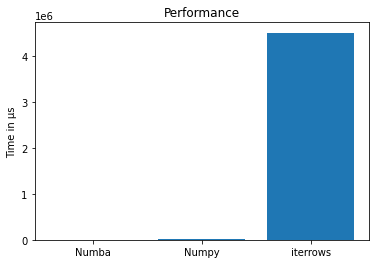

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(time_df['Type'], time_df['time(μs)'])
ax.set_title('Performance')
ax.set_ylabel('Time in μs')


# Saving all your hard work

In [ ]:
abnb_df

,id_visitor,id_session,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,sent_booking_request,next_id_session,next_dim_session_number,next_dim_user_agent,next_dim_device_app_combo,next_ds,next_ts_min,next_ts_max,next_did_search,next_sent_message,next_sent_booking_request
0,ed1329a6-064d-47e9-93bc-93f5a50822df,a8dfb8ed5aa79e00ff14b2da297c9778,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2015-02-16,2015-02-16 21:50:41,2015-02-16 22:13:42,0,0,0,b812bf56bf89b0b31f4e5b50d0c15ff8,84.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0.0,0.0,0.0
1,ed1329a6-064d-47e9-93bc-93f5a50822df,950277daef16f86dc2c05d2b212eea81,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,0,456083b5f5506ad125d595006819de1d,85.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0.0,0.0,0.0
2,ed1329a6-064d-47e9-93bc-93f5a50822df,ee4e2f99dd0c0bef2d40e4bdf880c862,85,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0,0,0,94d30e9f3c8f92ae691e49d77a884777,86.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0.0,0.0,0.0
3,ed1329a6-064d-47e9-93bc-93f5a50822df,59fbde7b5d35403116c461fa7fc1ab6e,86,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0,0,0,ab02139dc81bea4b126cf5043faf53d9,87.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0.0,0.0,0.0
4,ed1329a6-064d-47e9-93bc-93f5a50822df,ec8972a3c7256ea4dcba61ee2bd9e3a8,87,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0,0,0,6a69db1a5876e9798947f20e2c52bcc8,88.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 22:21:58,2015-02-19 22:22:02,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7751,1414271365_EuFmeZ+vsDuryP8F,2ae345e9ad2aff5195dab5528b63f7ef,3,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,iPad - Web,2014-12-30,2014-12-30 06:17:11,2014-12-30 06:53:15,1,0,0,8d59f1935a7f636eb6bcba0f27e36dcb,4.0,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,iPad - Web,2015-01-11,2015-01-11 03:09:42,2015-01-11 03:23:26,1.0,0.0,0.0
7752,1414271365_EuFmeZ+vsDuryP8F,3abcb63cbef3c7a5d77e7b7b5da0dacf,4,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,iPad - Web,2015-01-11,2015-01-11 03:09:42,2015-01-11 03:23:26,1,0,0,bba9bb8e12360e95a664e2f7c46124bc,5.0,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,iPad - Web,2015-02-16,2015-02-16 02:48:38,2015-02-16 02:59:20,1.0,0.0,0.0
7753,1414271365_EuFmeZ+vsDuryP8F,e7ce67245dc553d51673d33e7b1a53a7,5,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,iPad - Web,2015-02-16,2015-02-16 02:48:38,2015-02-16 02:59:20,1,0,0,7ad89a28468df5bab4c4244588806960,6.0,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,iPad - Web,2015-03-11,2015-03-11 10:33:52,2015-03-11 10:34:21,0.0,0.0,0.0
7754,1414271365_EuFmeZ+vsDuryP8F,472d2822a2707b384d27ec510594dcee,6,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,iPad - Web,2015-03-11,2015-03-11 10:33:52,2015-03-11 10:34:21,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
abnb_df.to_csv('abnb.csv')

In [ ]:
!ls

abnb.csv  sample_data


In [ ]:
# with sqlalchemy, we can put our data frame into a sql database image
from sqlalchemy import create_engine
# instantiate the engine 
engine = create_engine('sqlite://', echo=False)

In [ ]:
abnb_df.to_sql('abnb', con=engine)

In [ ]:
# now you can perform sql queries
result=engine.execute("SELECT * FROM abnb")

In [ ]:
result.fetchmany(20)

[(0, 'ed1329a6-064d-47e9-93bc-93f5a50822df', 'a8dfb8ed5aa79e00ff14b2da297c9778', 83, 'Airbnb/6.0 iPhone/8.1.2', 'iPhone - iOS', '2015-02-16', '2015-02-16 21:50:41', '2015-02-16 22:13:42', 0, 0, 0, 'b812bf56bf89b0b31f4e5b50d0c15ff8', 84.0, 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36', 'Desktop - Chrome', '2015-02-18', '2015-02-18 11:57:15', '2015-02-18 12:12:48', 0.0, 0.0, 0.0),
 (1, 'ed1329a6-064d-47e9-93bc-93f5a50822df', '950277daef16f86dc2c05d2b212eea81', 84, 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36', 'Desktop - Chrome', '2015-02-18', '2015-02-18 11:57:15', '2015-02-18 12:12:48', 0, 0, 0, '456083b5f5506ad125d595006819de1d', 85.0, 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.115 Safari/537.36', 'Desktop - Chrome', '2015-02-18', '2015-02-18 13:02:13', '2015-02-18 13:05:36', 0.0, 0.0, 0.0),
 (2, 'ed1329a6

# Whats next?

## Keep Learning:
The most important thing to do it keep learning!
- [RSVP for Intro to Machine Learning](https://www.eventbrite.com/e/introduction-to-machine-learning-live-online-tickets-147278972371)
- [RSVP for Data Science Info Session](https://www.eventbrite.com/e/galvanize-data-science-info-session-tickets-148654127497?aff=erelexpmlt)
- [Data Science Prep Course](https://bit.ly/DSIPREP-32q7lQj) 

USE THIS INFORMATION TO GET YOUR **FREE** PROMO CODE FOR GALVANIZE DATA SCIENCE PREMIUM PREP AND SEE ALL UPCOMING GALVANIZE PYTHON INTRODUCTORY EVENTS: [LINK](https://www.canva.com/design/DAESYk9bP4U/GyCxPARMTAXzA2OcbLt4Xg/view?website#2:4.-once-you-have-attended-all-four-workshops-and-have-gathered-all-four-codes-e-mail-liz-at-liz.anayaramos-galvanize.com-with-your-name-the-email-address-you-used-to-register-on-zoom-and-the-codes-you-gathered-during-the-workshops-to-receive-the-final-promo-code)



## Stay Connected:
- Linkedin: [https://www.linkedin.com/in/jameshskelton/](https://www.linkedin.com/in/jameshskelton/)

- email: james.skelton@galvanize.com